In [2]:
from util import get_corpus_text, vis_graph
from build_network import build_network

import networkx as nx

%matplotlib inline

In [3]:
texts, _ = get_corpus_text('Three Months for Semantic Network Experiments', 'MSNBCW')

In [3]:
sum([len(text) for text in texts])

0

In [4]:
e = build_network(texts, alpha=0.75)

In [6]:
#tau = 0.6

#A = np.copy(e.edgeweight_mat)
#A[A <= tau] = 0.0
#A[A > tau] = 1.0
from semcable.util import _calculate_adjacency
A = _calculate_adjacency(e.edgeweight_mat, 20.16, 1e-3)
g = nx.from_numpy_matrix(A)

degs = np.flipud(np.sort(np.array(list(g.degree().values()))))
#plt.hist(list(degs.values()), bins=20)


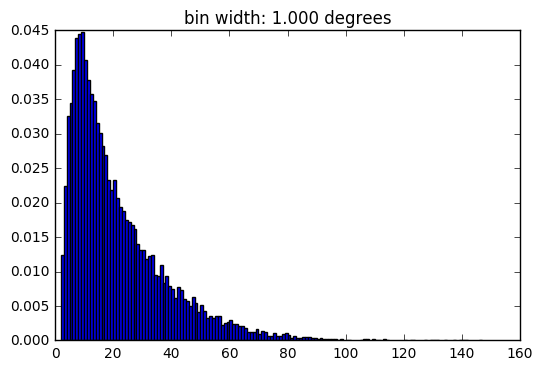

In [39]:
from numpy import histogram
from collections import Counter
  
c = list(Counter(degs).items())  #[20:]
b = np.array([a[0] for a in c])
v = np.array([a[1] for a in c], dtype=float)
v = v / v.sum()

bin_width = b[1] - b[0]

plt.bar(b, v, bin_width)
plt.title('bin width: %.3f degrees' % bin_width)
plt.show()

nbins = len(b)


logv = np.log10(v)
v_isfinite = np.isfinite(logv)
logv = logv[v_isfinite]

x = np.arange(len(v)) + 1
logx = np.log10(x)
logx = logx[v_isfinite]

coefficients = np.polyfit(logx, logv, 1)
#print(coefficients)
polynomial = np.poly1d(coefficients)
ys = polynomial(np.arange(nbins))

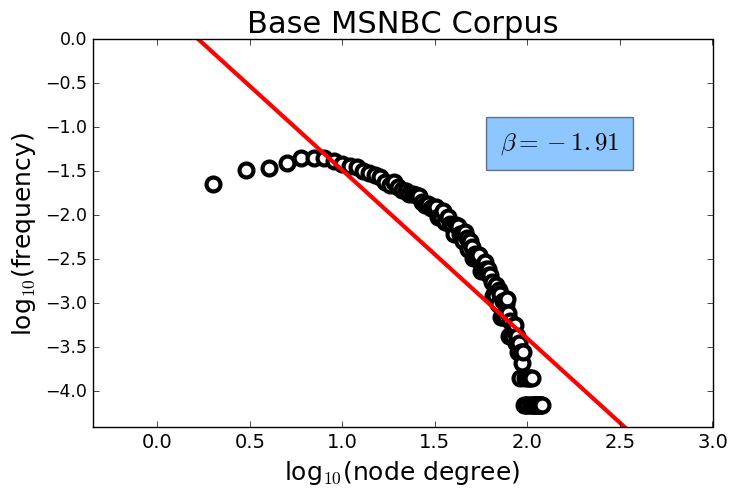

In [40]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
plt.plot(logx[1:], logv[1:], marker='o', mew=3, color='white', lw=0, ms=10)
plt.plot(np.arange(nbins)[:4], ys[:4], color='red', lw=3)
plt.xlim([-0.35, 3])
plt.ylim([logv.min() - 0.25, 0])
plt.xlabel('log$_{10}$(node degree)', size=18)
plt.ylabel('log$_{10}$(frequency)', size=18)
plt.title('Base MSNBC Corpus', size=22)
plt.text(1.85, -1.25, '$\\beta = %.2f$' % coefficients[0], fontsize=18, 
         bbox={'facecolor':'#1E90FF', 'alpha':0.5, 'pad':10})
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=12.5)
plt.show()

on word 0 out of 6
on word 1 out of 6
on word 2 out of 6
on word 3 out of 6
on word 4 out of 6
on word 5 out of 6


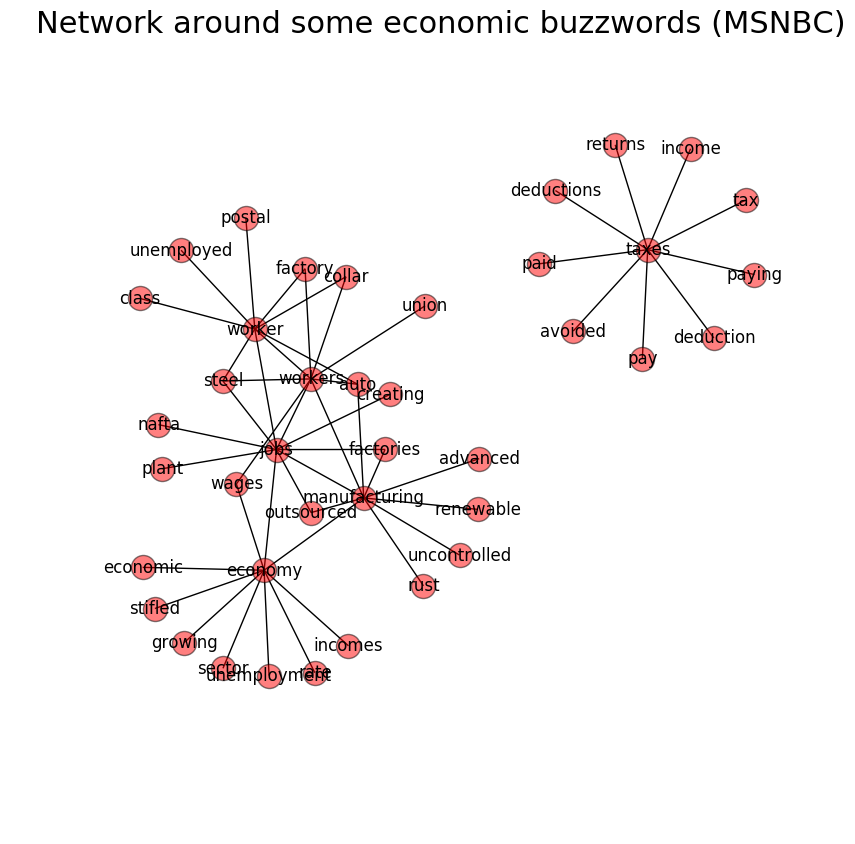

In [45]:
g = e.generate_graph(10, words=['jobs', 'manufacturing', 'taxes', 'economy', 'workers', 'worker'])
fig, ax = vis_graph(g, figsize=(10, 10))
ax.set_title('Network around some economic buzzwords (MSNBC)', size=22)
#fig.patch.set_visible(False)

ax.axis('off')
plt.show()